# Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Config

In [2]:
sns.set(style= 'whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Dataset

In [3]:
df = pd.read_csv('/content/logistics_dataset.csv')

In [4]:
print('Dimensiones del dataset:', df.shape)
display(df.head())
display(df.info())
display(df.describe())

Dimensiones del dataset: (150000, 14)


,package_id,customer_id,customer_type,delivery_date,delivery_days,package_value,package_weight_kg,delivery_cost,region,zone,provider,shipping_type,is_peak_season,is_profitable
0,PKG000000,CUST1259,frecuente,2024-08-16,2.8,0.34,2.67,1.91,Arequipa,Sur,RapidBox,Normal,0,0
1,PKG000001,CUST1354,nuevo,2024-12-25,1.4,0.69,0.82,3.70,Piura,Norte,FastCargo,Normal,1,0
2,PKG000002,CUST0062,frecuente,2024-11-29,16.9,0.36,3.76,1.96,Tacna,Sur,RapidBox,Normal,1,0
3,PKG000003,CUST0237,frecuente,2024-11-13,1.7,1.25,2.05,3.83,Callao,Centro,LogisticX,Normal,1,0
4,PKG000004,CUST0419,nuevo,2024-04-05,3.2,1.10,1.32,2.18,Puno,Sur,LogisticX,Normal,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   package_id         150000 non-null  object 
 1   customer_id        150000 non-null  object 
 2   customer_type      150000 non-null  object 
 3   delivery_date      150000 non-null  object 
 4   delivery_days      150000 non-null  float64
 5   package_value      150000 non-null  float64
 6   package_weight_kg  150000 non-null  float64
 7   delivery_cost      150000 non-null  float64
 8   region             150000 non-null  object 
 9   zone               150000 non-null  object 
 10  provider           150000 non-null  object 
 11  shipping_type      150000 non-null  object 
 12  is_peak_season     150000 non-null  int64  
 13  is_profitable      150000 non-null  int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 16.0+ MB


None

,delivery_days,package_value,package_weight_kg,delivery_cost,is_peak_season,is_profitable
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3.014115,1.345290,1.975838,2.796994,0.501433,0.041653
std,2.116759,1.770419,1.300599,1.025026,0.500000,0.199796
min,0.500000,0.010000,0.120000,1.000000,0.000000,0.000000
25%,1.400000,0.410000,1.100000,1.930000,0.000000,0.000000
50%,2.500000,0.810000,1.650000,2.290000,1.000000,0.000000
75%,4.000000,1.600000,2.480000,3.900000,1.000000,0.000000
max,20.700000,60.450000,17.000000,5.200000,1.000000,1.000000


# Análisis Univariado: distribución de variables numéricas

In [5]:
df.columns

Index(['package_id', 'customer_id', 'customer_type', 'delivery_date',
       'delivery_days', 'package_value', 'package_weight_kg', 'delivery_cost',
       'region', 'zone', 'provider', 'shipping_type', 'is_peak_season',
       'is_profitable'],
      dtype='object')

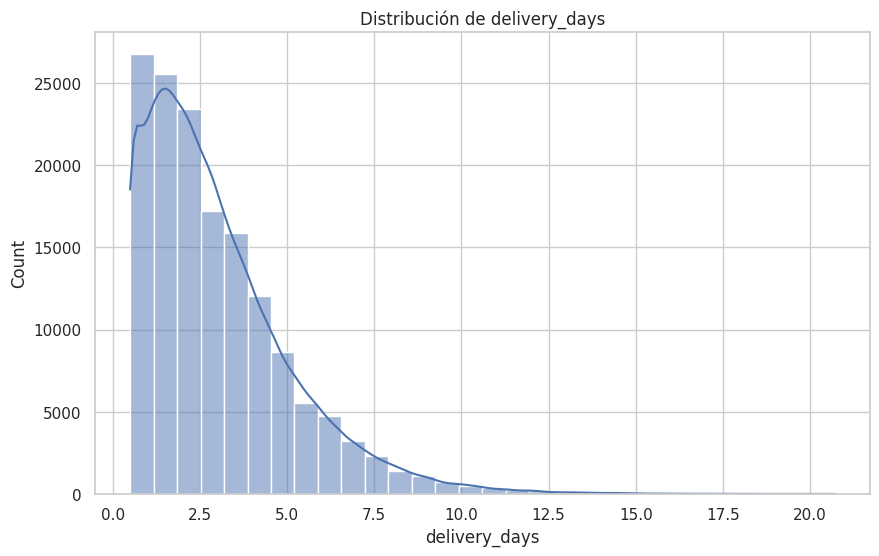

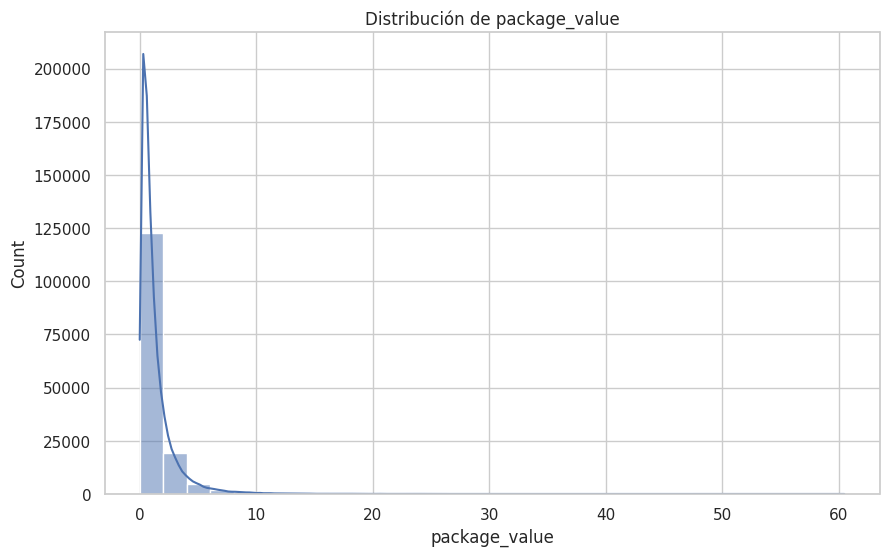

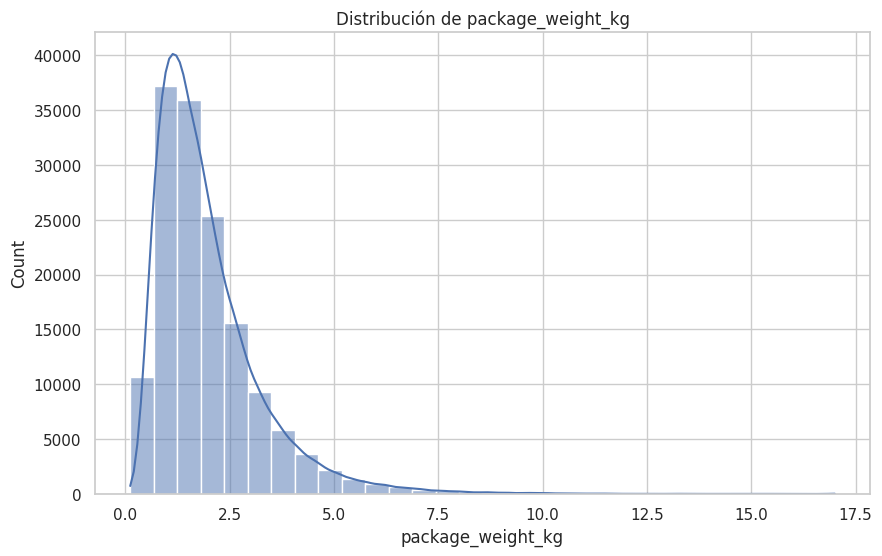

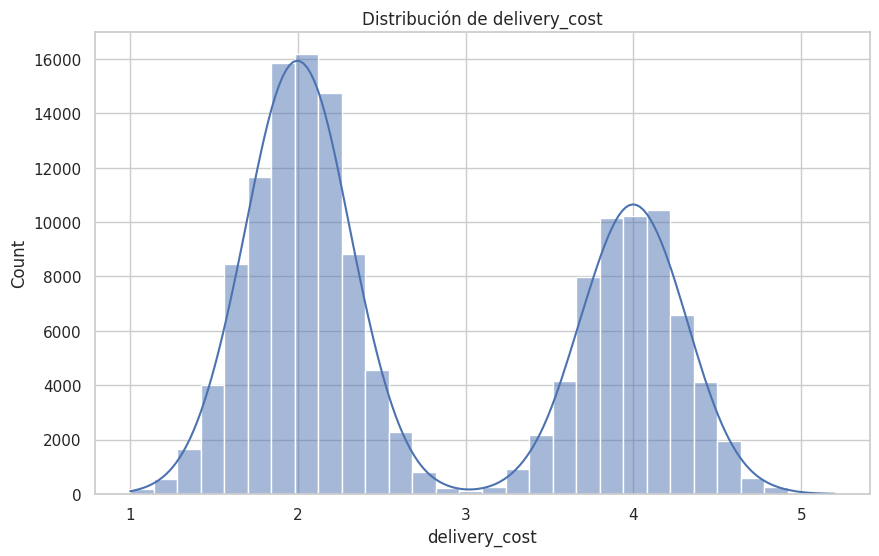

In [6]:
vars_num = ['delivery_days', 'package_value', 'package_weight_kg', 'delivery_cost']

for col in vars_num:
  plt.figure()
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(f'Distribución de {col}')
  plt.show()

# Distribución de delivery_costo por shipping_type

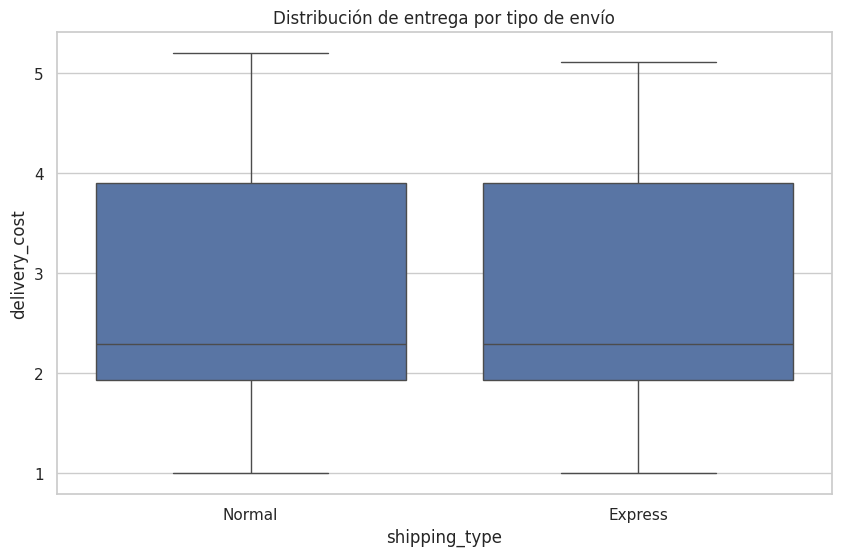

In [7]:
plt.figure()
sns.boxplot(x='shipping_type', y='delivery_cost', data=df)
plt.title('Distribución de entrega por tipo de envío')
plt.show()

# Correlaciones entre variables

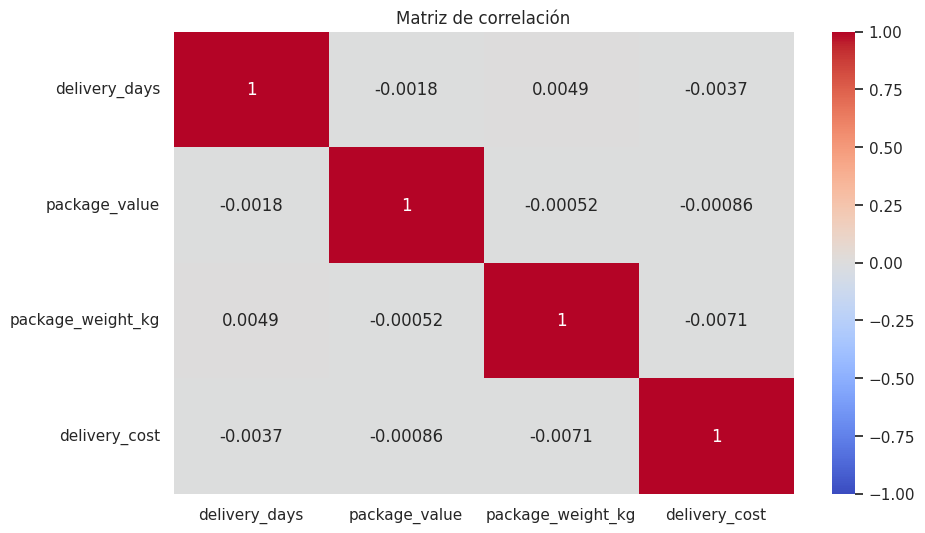

In [8]:
plt.figure()
sns.heatmap(df[vars_num].corr(), annot=True, cmap='coolwarm', vmin=-1 ,vmax=1)
plt.title('Matriz de correlación')
plt.show()

# Estacionalidad

In [9]:
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df['month'] = df['delivery_date'].dt.month_name()

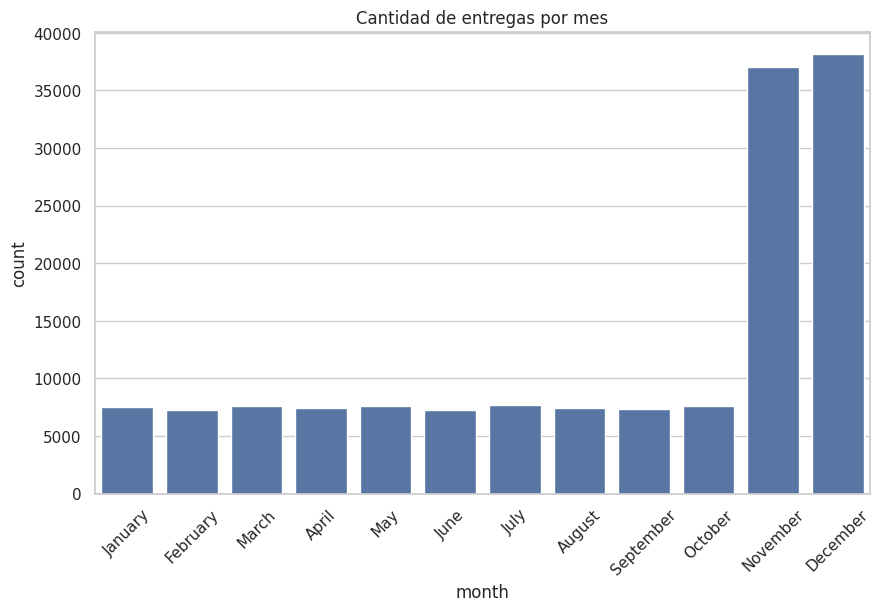

In [10]:
plt.figure()
sns.countplot(x='month', data=df, order=pd.date_range('2024-01-01', periods=12, freq='MS').strftime('%B'))
plt.title('Cantidad de entregas por mes')
plt.xticks(rotation=45)
plt.show()

# Variables categóricas: proporciones

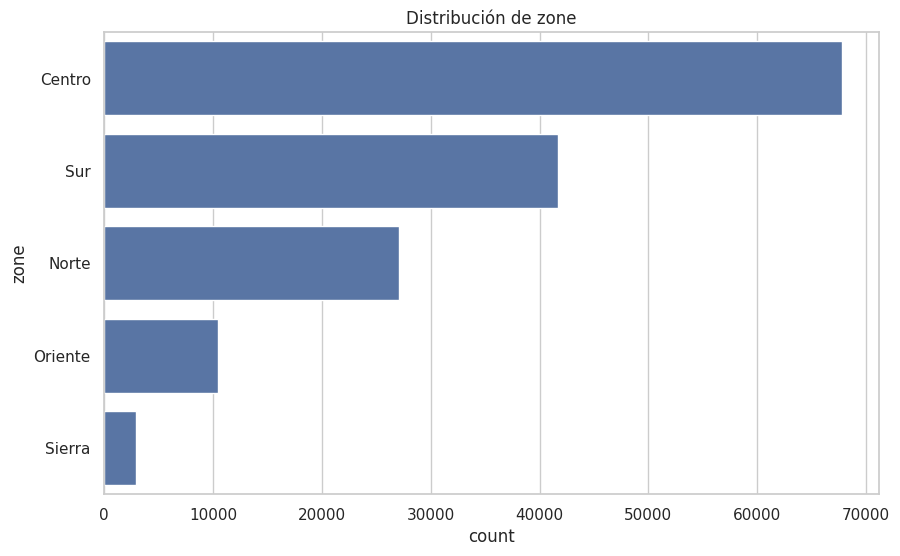

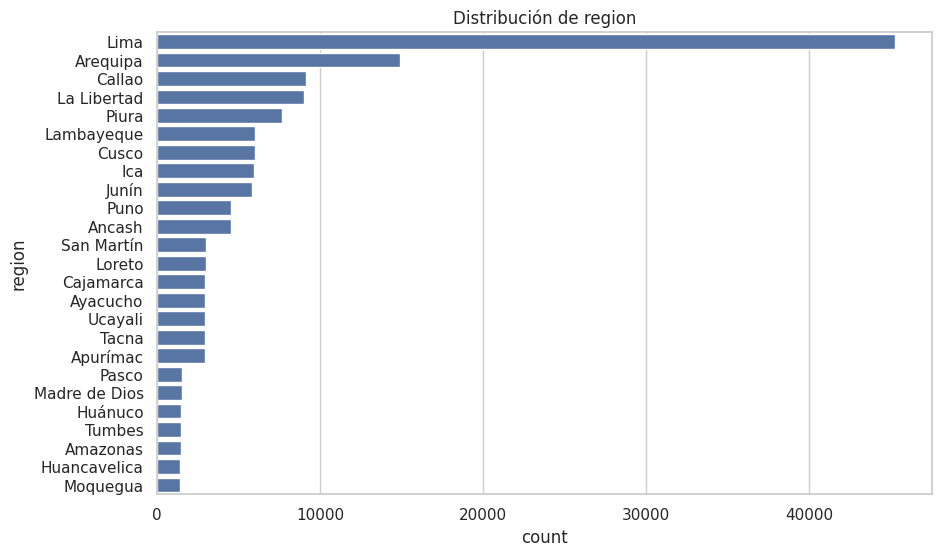

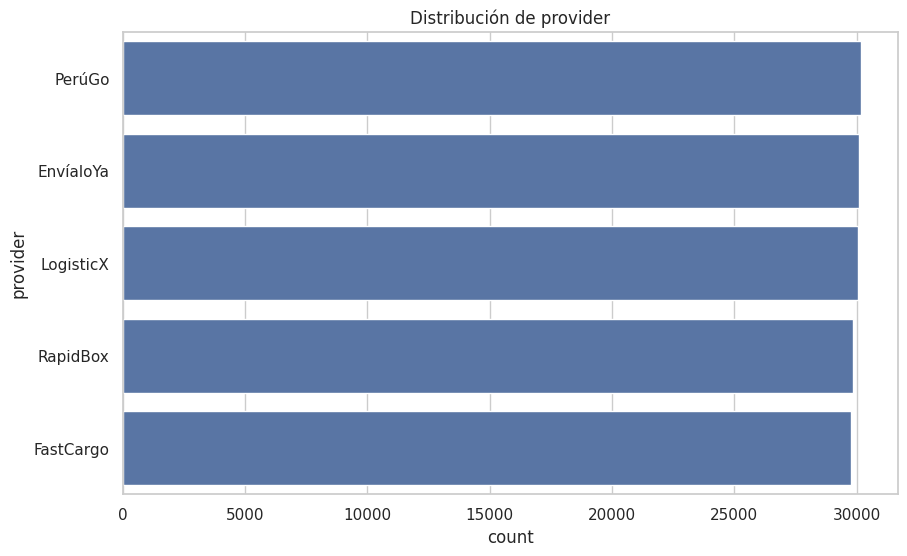

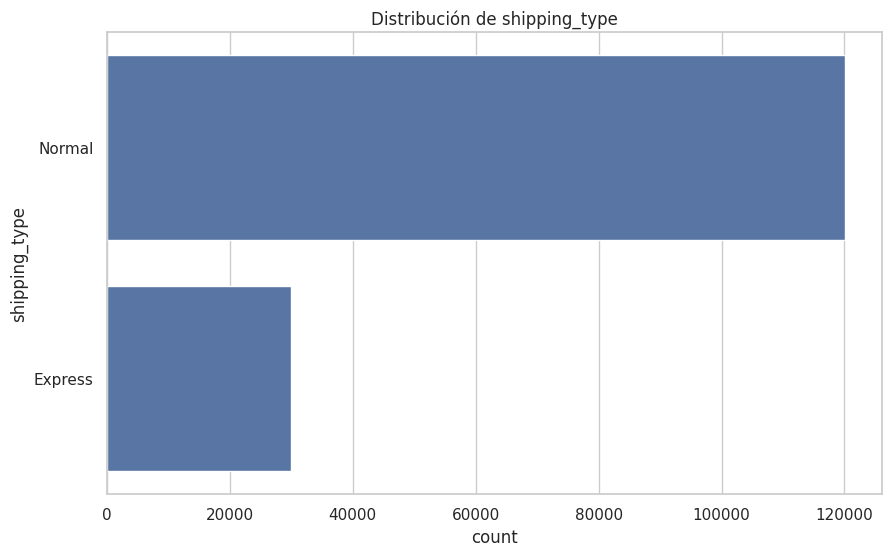

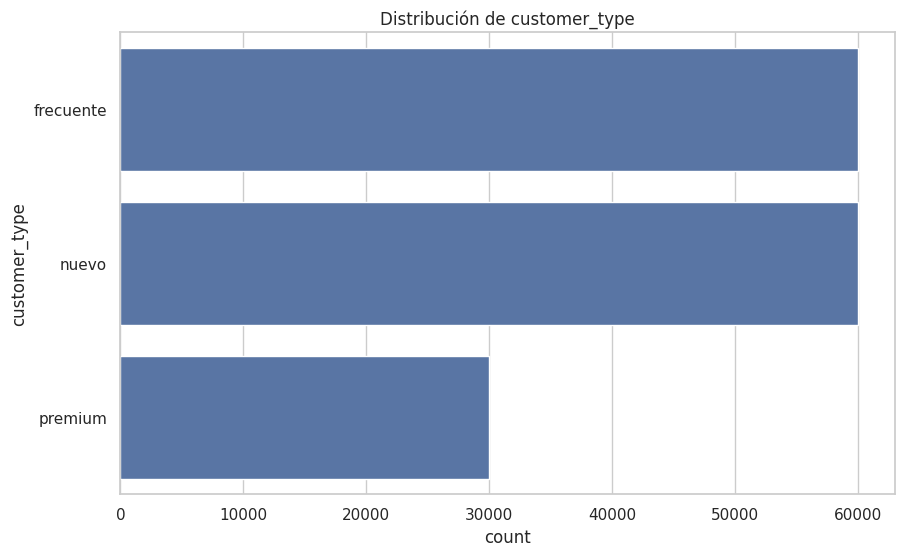

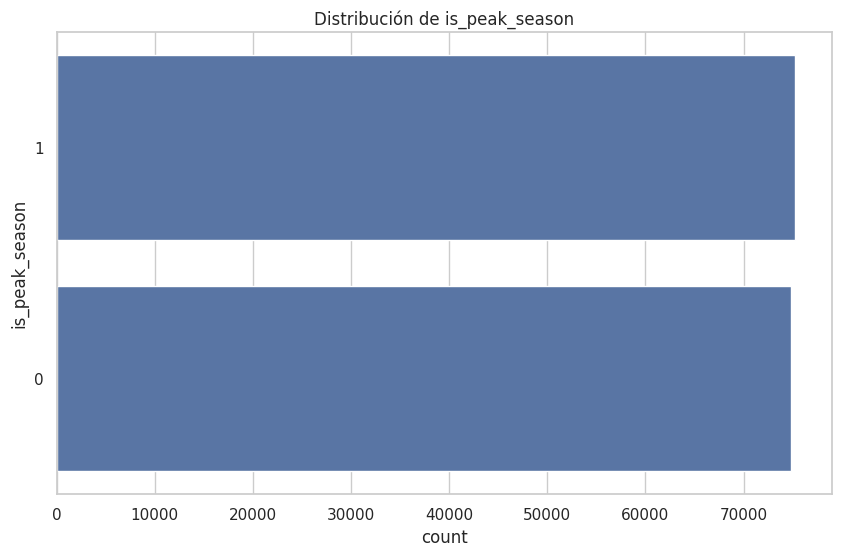

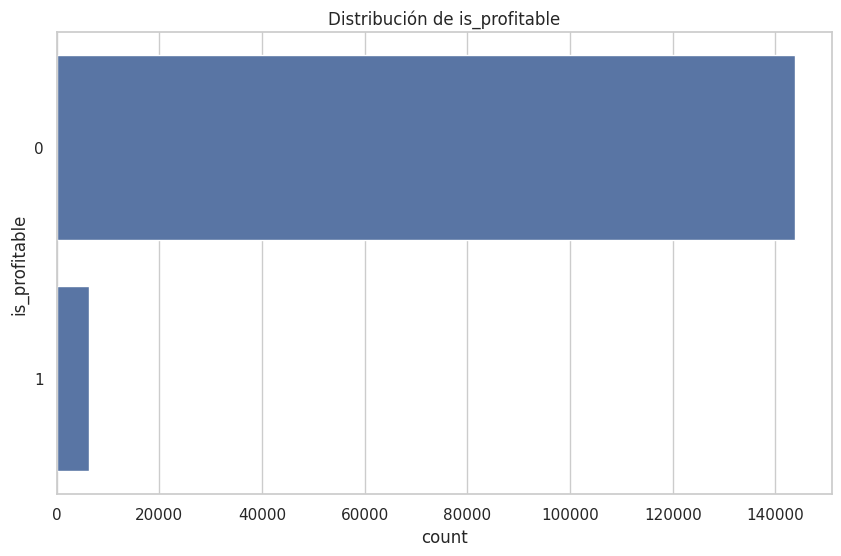

In [11]:
cat_vars = ['zone', 'region', 'provider', 'shipping_type', 'customer_type', 'is_peak_season', 'is_profitable']

for col in cat_vars:
    plt.figure()
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.show()

# ¿Qué afecta la rentabilidad?

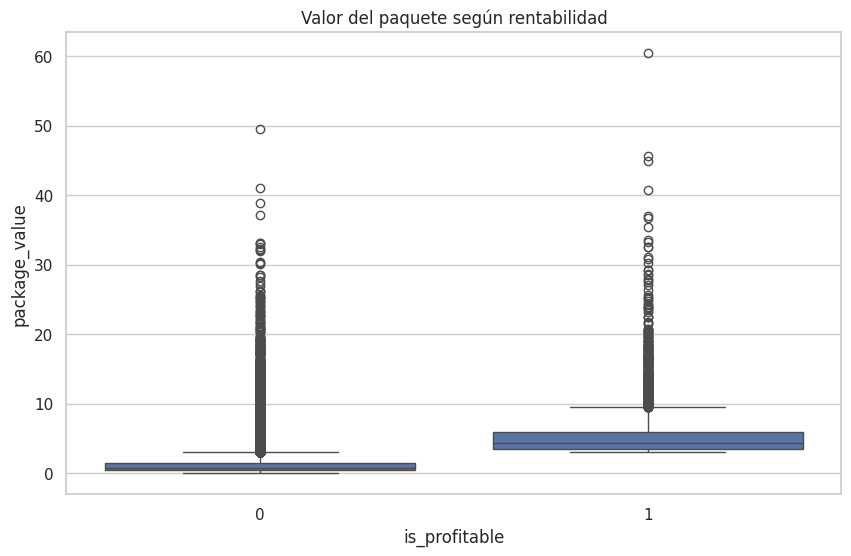

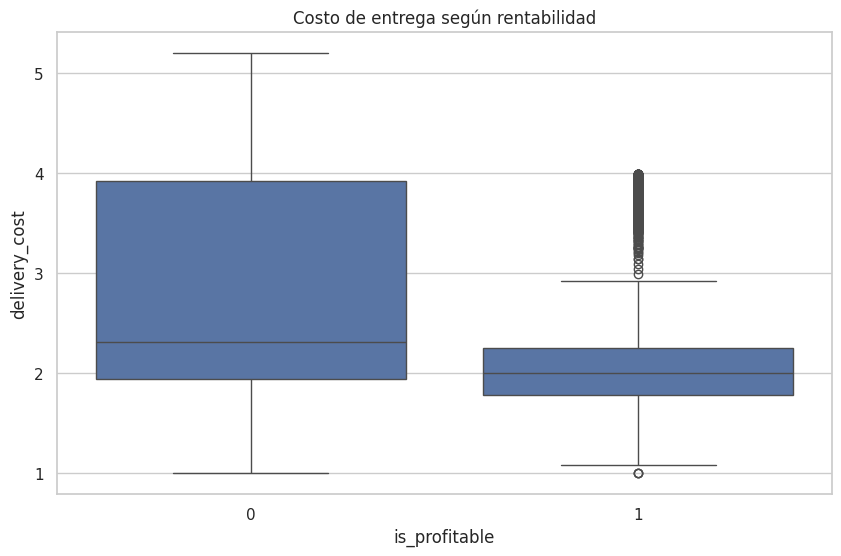

In [12]:
plt.figure()
sns.boxplot(x='is_profitable', y='package_value', data=df)
plt.title("Valor del paquete según rentabilidad")
plt.show()

plt.figure()
sns.boxplot(x='is_profitable', y='delivery_cost', data=df)
plt.title("Costo de entrega según rentabilidad")
plt.show()

# Feature Engineering

### Costo por kg

In [13]:
df['cost_per_kg'] = (df['delivery_cost'] / df['package_weight_kg']).round(2)

### Valor por kg

In [14]:
df['value_per_kg'] = (df['package_value'] / df['package_weight_kg']).round(2)

### Margen simple

In [15]:
df['profit_margin'] = (df['package_value'] - df['delivery_cost']).round(2)

### Dummy de peso

In [16]:
df['is_heavy'] = (df['package_weight_kg'] > 5).astype(int)

### Dummy de alto valor

In [17]:
df['is_high_value'] = (df['package_value'] > 20).astype(int)

## Visualización

In [18]:
df.head(5)

,package_id,customer_id,customer_type,delivery_date,delivery_days,package_value,package_weight_kg,delivery_cost,region,zone,provider,shipping_type,is_peak_season,is_profitable,month,cost_per_kg,value_per_kg,profit_margin,is_heavy,is_high_value
0,PKG000000,CUST1259,frecuente,2024-08-16,2.8,0.34,2.67,1.91,Arequipa,Sur,RapidBox,Normal,0,0,August,0.72,0.13,-1.57,0,0
1,PKG000001,CUST1354,nuevo,2024-12-25,1.4,0.69,0.82,3.70,Piura,Norte,FastCargo,Normal,1,0,December,4.51,0.84,-3.01,0,0
2,PKG000002,CUST0062,frecuente,2024-11-29,16.9,0.36,3.76,1.96,Tacna,Sur,RapidBox,Normal,1,0,November,0.52,0.10,-1.60,0,0
3,PKG000003,CUST0237,frecuente,2024-11-13,1.7,1.25,2.05,3.83,Callao,Centro,LogisticX,Normal,1,0,November,1.87,0.61,-2.58,0,0
4,PKG000004,CUST0419,nuevo,2024-04-05,3.2,1.10,1.32,2.18,Puno,Sur,LogisticX,Normal,0,0,April,1.65,0.83,-1.08,0,0


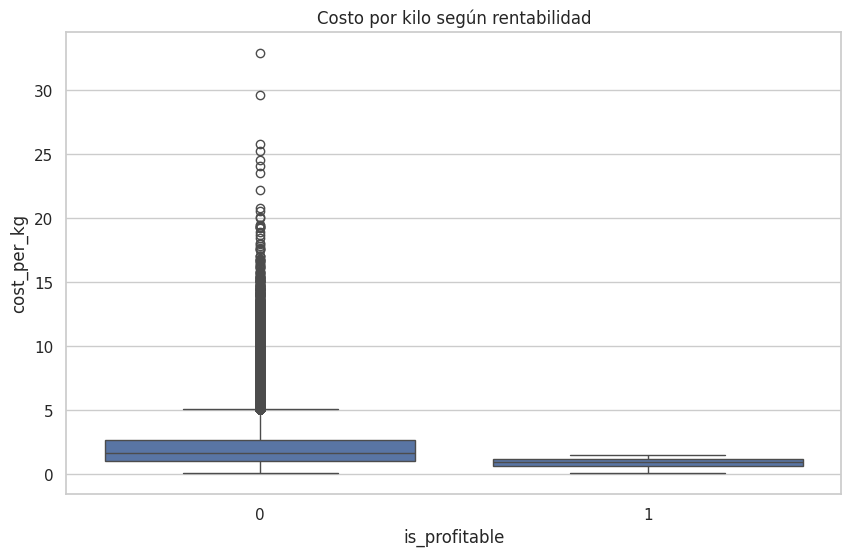

In [19]:
# 1. Costo vs profit

plt.figure()
sns.boxplot(x='is_profitable', y='cost_per_kg', data=df)
plt.title('Costo por kilo según rentabilidad')
plt.show()

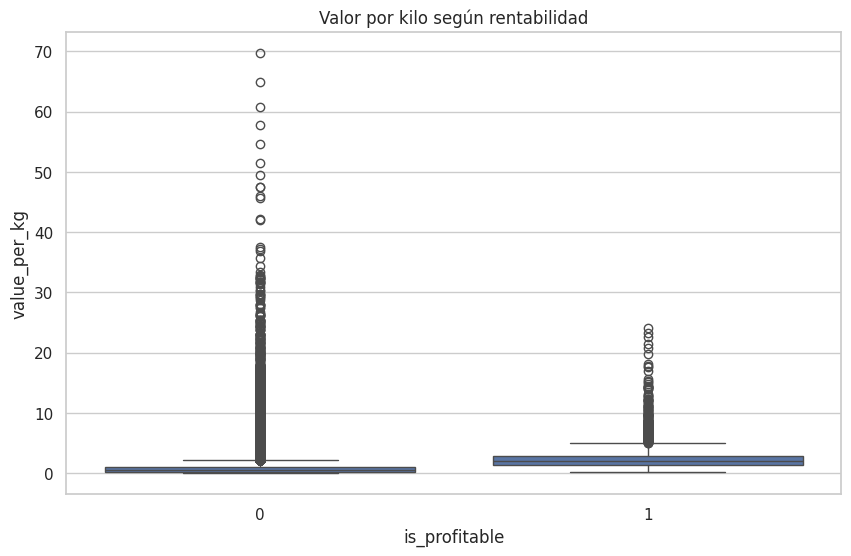

In [20]:
# 2. Valor por kg vs Profit

plt.figure()
sns.boxplot(x='is_profitable', y='value_per_kg', data=df)
plt.title('Valor por kilo según rentabilidad')
plt.show()

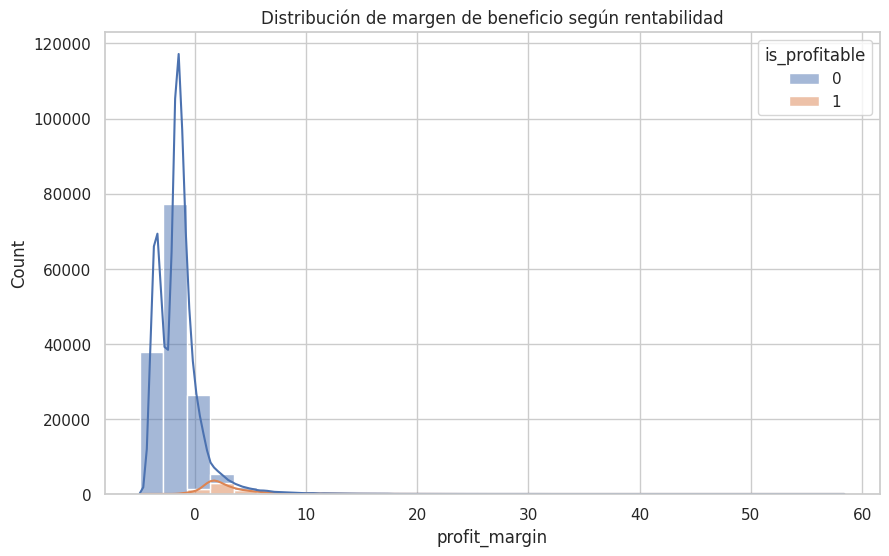

In [21]:
# 3. Profit por categoría

plt.figure()
sns.histplot(data=df, x='profit_margin', hue='is_profitable', multiple='stack', bins=30, kde=True)
plt.title('Distribución de margen de beneficio según rentabilidad')
plt.show()

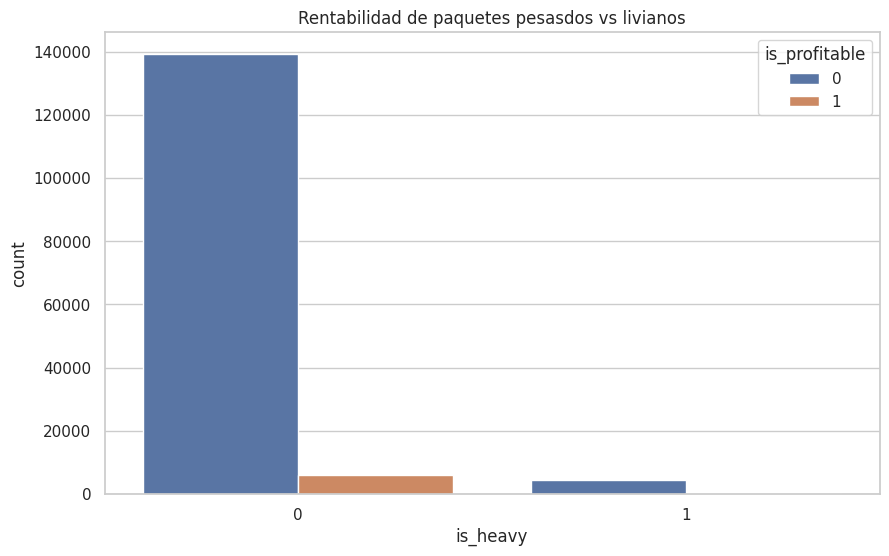

In [22]:
# 4. Peso vs Profit

sns.countplot(x='is_heavy', hue='is_profitable', data=df)
plt.title('Rentabilidad de paquetes pesasdos vs livianos')
plt.show()

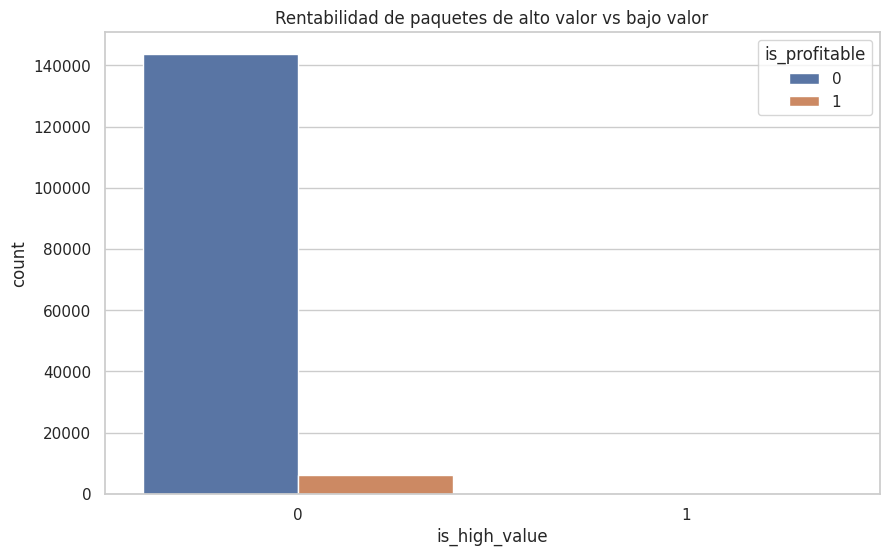

In [23]:
# 5. Valor vs Profit

sns.countplot(x='is_high_value', hue='is_profitable', data=df)
plt.title('Rentabilidad de paquetes de alto valor vs bajo valor')
plt.show()

### CONCLUSIONES

- La variable `cost_per_kg` mostró que los paquetes rentables tienen un costo por kilo significativamente menor, lo cual valida su uso como feature clave para clasificación.
- La variable `value_per_kg` presentó mayor valor por kilo en paquetes rentables, lo que sugiere que los envíos con alto valor relativo tienden a ser más rentables.
- `profit_margin` permitió visualizar diferencias claras entre paquetes con margen negativo (no rentables) y positivo (rentables), validando la lógica aplicada en la creación del target.
- La flag `is_heavy` confirmó que los paquetes más pesados son en su mayoría no rentables, lo que puede deberse al mayor costo asociado al peso.
- `is_high_value` también mostró que los paquetes con alto valor tienen mayor proporción de rentabilidad, reforzando la lógica económica esperada.
- Todas estas nuevas variables presentan un patrón claro y alineado con el negocio logístico, por lo que serán utilizadas como insumos en la fase de modelado.

# Dataset del modelo

In [24]:
# Selección de columnas numéricas útiles
features_numericas = [
    'delivery_days',
    'package_value',
    'package_weight_kg',
    'delivery_cost',
    'cost_per_kg',
    'value_per_kg',
    'is_heavy',
    'is_high_value'
]

In [26]:
#  Variables categóricas que vamos a codificar con One Hot
features_categoricas = ['provider', 'shipping_type', 'customer_type']

#  One Hot Encoding
df_encoded = pd.get_dummies(df[features_categoricas], prefix=features_categoricas)

#  Concatenamos las numéricas + las codificadas
df_modelo = pd.concat([df[features_numericas], df_encoded], axis=1)

#  Target
target = 'is_profitable'

#  Matrices finales para modelado
X = df_modelo.copy()
y = df[target].copy()

print("✅ Dataset listo para modelar:")
print("X shape:", X.shape)
print("y distribución:")
print(y.value_counts())

✅ Dataset listo para modelar:
X shape: (150000, 18)
y distribución:
is_profitable
0    143752
1      6248
Name: count, dtype: int64


In [28]:
X.to_csv("X_features.csv", index=False)
y.to_csv("y_target.csv", index=False)

In [29]:
from google.colab import files
files.download("X_features.csv")
files.download("y_target.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusión

Este notebook incluyó:
- Análisis exploratorio completo del dataset sintético.
- Generación de nuevas variables a través de Feature Engineering.
- Validación visual y lógica de las features creadas.
- Construcción del dataset final (`X`, `y`) listo para modelado.

Los archivos `X_features.csv` y `y_target.csv` fueron guardados y están disponibles para la siguiente fase: entrenamiento de modelos supervisados.

👉 Próximo notebook: `model_training_is_profitable.ipynb`